In [1]:
import pandas as pd
import numpy as np
import random
import requests

# Don't forget to 'pip install fastf1'
import fastf1 as ff1

# Don't forget to 'pip install seaborn'
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [3]:
# Specify the number of rounds we want in our plot (in other words, specify the current round)
rounds = 22

# Initiate an empty dataframe to store our data
all_championship_standings = pd.DataFrame()

# We also want to store which driver drives for which team, which will help us later
driver_team_mapping = {}

# Initate a loop through all the rounds
for i in range(1, rounds + 1):
    # Make request to driverStandings endpoint for the current round
    race = ergast_retrieve(f'current/{i}/driverStandings')
    
    # Get the standings from the result
    standings = race['StandingsTable']['StandingsLists'][0]['DriverStandings']
    #print(standings)
    # Initiate a dictionary to store the current rounds' standings in
    current_round = {'round': i}
    
    
    # Loop through all the drivers to collect their information
    for i in range(len(standings)):
        driver = standings[i]['Driver']['code']
        points = standings[i]['points']
        #print(position)
         # Store the drivers' position
        current_round[driver] = int(points) 
         # Create mapping for driver-team to be used for the coloring of the lines
        driver_team_mapping[driver] = standings[i]['Constructors'][0]['name']
        # Append the current round to our fial dataframe
    all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
    
    # Set the round as the index of the dataframe
all_championship_standings = all_championship_standings.set_index('round')    
print(driver_team_mapping)

C:\Users\User\AppData\Local\Temp\ipykernel_1652\3479928581.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1652\3479928581.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1652\3479928581.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1652\3479928581.py:32: FutureWarning: The frame.append method i

{'LEC': 'Ferrari', 'SAI': 'Ferrari', 'HAM': 'Mercedes', 'RUS': 'Mercedes', 'MAG': 'Haas F1 Team', 'BOT': 'Alfa Romeo', 'OCO': 'Alpine F1 Team', 'TSU': 'AlphaTauri', 'ALO': 'Alpine F1 Team', 'ZHO': 'Alfa Romeo', 'MSC': 'Haas F1 Team', 'STR': 'Aston Martin', 'ALB': 'Williams', 'RIC': 'McLaren', 'NOR': 'McLaren', 'LAT': 'Williams', 'HUL': 'Aston Martin', 'PER': 'Red Bull', 'VER': 'Red Bull', 'GAS': 'AlphaTauri', 'VET': 'Aston Martin', 'DEV': 'Williams'}


C:\Users\User\AppData\Local\Temp\ipykernel_1652\3479928581.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)


In [4]:
# Melt data so it can be used as input for plot
all_championship_standings_melted = pd.melt(all_championship_standings.reset_index(), ['round'])
#print(all_championship_standings_melted)

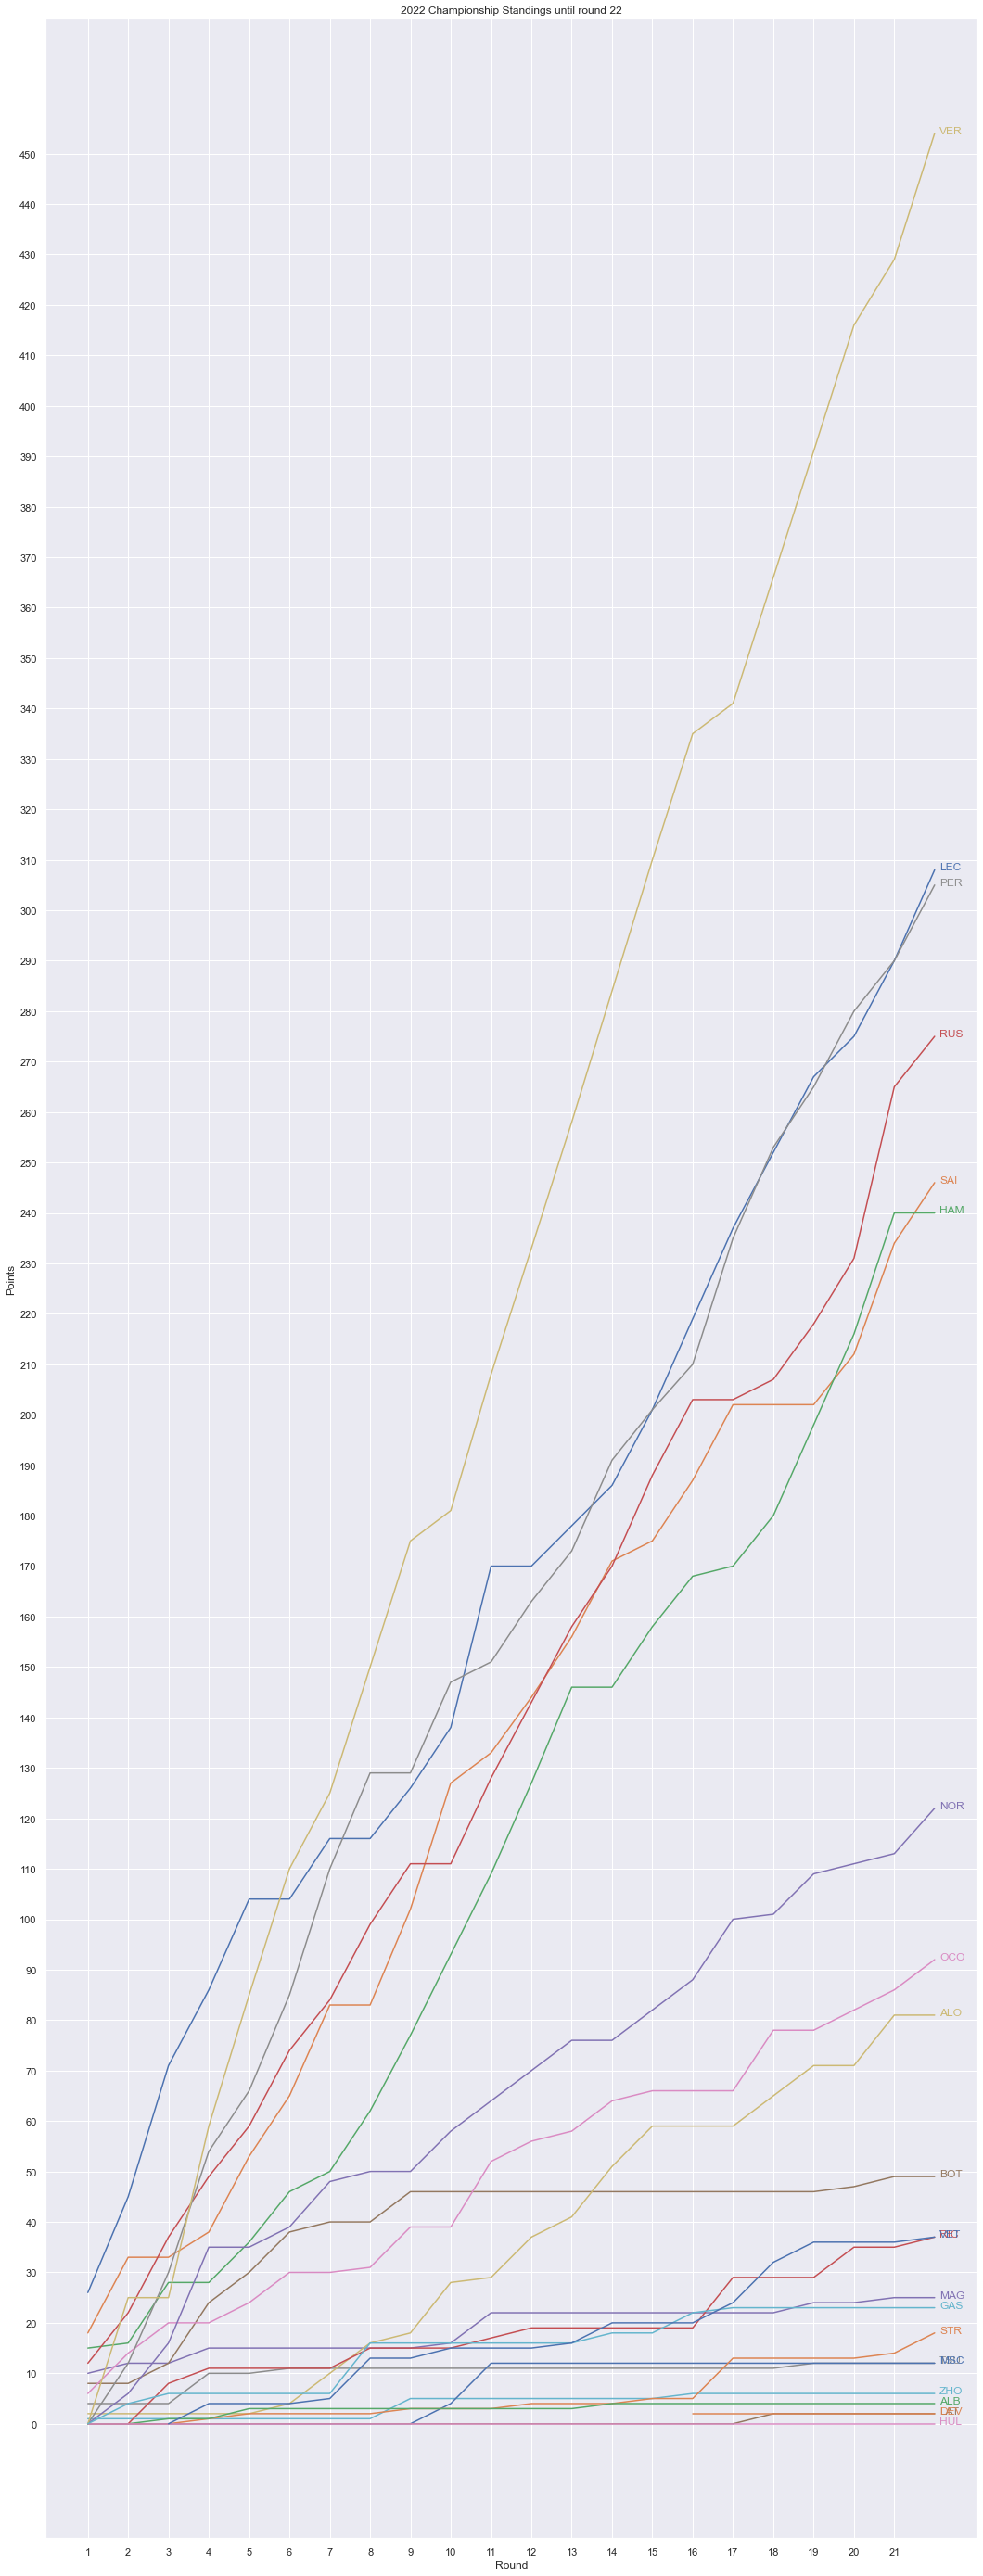

In [5]:
# Increase the size of the plot 
sns.set(rc={'figure.figsize':(18,50)})

# Initiate the plot
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title("2022 Championship Standings until round 22")

# Draw a line for every driver in the data by looping through all the standings
for driver in pd.unique(all_championship_standings_melted['variable']):
    sns.lineplot(
        x='round', 
        y='value', 
        data=all_championship_standings_melted.loc[all_championship_standings_melted['variable']==driver]
    )

# Invert Y-axis to have championship leader (#1) on top
#ax.invert_yaxis()

# Set the values that appear on the x- and y-axes
ax.set_xticks(range(1, rounds))
ax.set_yticks(range(0, 460, 10))

# Set the labels of the axes
ax.set_xlabel("Round")
ax.set_ylabel("Points")

# Add the driver name to the lines
for line, name in zip(ax.lines, all_championship_standings.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
        
    text = ax.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(1, 0),
        color=line.get_color(),
        xycoords=(
            ax.get_xaxis_transform(),
            ax.get_yaxis_transform()
        ),
        textcoords="offset points"
    )

In [13]:
# Specify the number of rounds we want in our plot (in other words, specify the current round)
rounds = 22

# Initiate an empty dataframe to store our data
all_championship_standings1 = pd.DataFrame()

# We also want to store which driver drives for which team, which will help us later
team = {}

# Loop through all the drivers to collect their information
for i in range(1, rounds + 1):
    # Make request to driverStandings endpoint for the current round
    race1 = ergast_retrieve(f'current/{i}/driverStandings')
    
    # Get the standings from the result
    standings1 = race1['StandingsTable']['StandingsLists'][0]['DriverStandings']

    # Initiate a dictionary to store the current rounds' standings in
    current_round1 = {'round': i}


    for i in range(len(standings1)):
    
        #driver1 = standings1[i]['Driver']['code']
        points = standings1[i]['points']
        driver1 = standings1[i]['Driver']['code']
        
        current_round1[driver1] = int(points) 
        #current_round1[driver1] = [constructor, int(points)]
   
    all_championship_standings1 = all_championship_standings1.append(current_round1, ignore_index=True)
   
    # Set the round as the index of the dataframe
all_championship_standings2 = all_championship_standings1.set_index('round')
print(all_championship_standings2)

C:\Users\User\AppData\Local\Temp\ipykernel_1652\2639426627.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_championship_standings1 = all_championship_standings1.append(current_round1, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1652\2639426627.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_championship_standings1 = all_championship_standings1.append(current_round1, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1652\2639426627.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_championship_standings1 = all_championship_standings1.append(current_round1, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1652\2639426627.py:31: FutureWarning: The frame.append

       LEC  SAI  HAM  RUS  MAG  BOT  OCO  TSU  ALO  ZHO  ...  ALB  RIC  NOR  \
round                                                    ...                  
1       26   18   15   12   10    8    6    4    2    1  ...    0    0    0   
2       45   33   16   22   12    8   14    4    2    1  ...    0    0    6   
3       71   33   28   37   12   12   20    4    2    1  ...    1    8   16   
4       86   38   28   49   15   24   20   10    2    1  ...    1   11   35   
5      104   53   36   59   15   30   24   10    2    1  ...    3   11   35   
6      104   65   46   74   15   38   30   11    4    1  ...    3   11   39   
7      116   83   50   84   15   40   30   11   10    1  ...    3   11   48   
8      116   83   62   99   15   40   31   11   16    1  ...    3   15   50   
9      126  102   77  111   15   46   39   11   18    5  ...    3   15   50   
10     138  127   93  111   16   46   39   11   28    5  ...    3   15   58   
11     170  133  109  128   22   46   52   11   29  

C:\Users\User\AppData\Local\Temp\ipykernel_1652\2639426627.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_championship_standings1 = all_championship_standings1.append(current_round1, ignore_index=True)


In [15]:
#Filling in the data gaps
all_championship_standings2.fillna(0, inplace = True)

In [16]:
#Adding data by commands
all_championship_standings2['Ferrari'] = all_championship_standings2['LEC'] + all_championship_standings2['SAI']
all_championship_standings2['Red Bull'] = all_championship_standings2['VER'] + all_championship_standings2['PER']
all_championship_standings2['Mercedes'] = all_championship_standings2['HAM'] + all_championship_standings2['RUS']
all_championship_standings2['Alpine'] = all_championship_standings2['ALO'] + all_championship_standings2['OCO']
all_championship_standings2['McLaren'] = all_championship_standings2['NOR'] + all_championship_standings2['RIC']
all_championship_standings2['Alfa Romeo'] = all_championship_standings2['BOT'] + all_championship_standings2['ZHO']
all_championship_standings2['Aston Martin'] = all_championship_standings2['VET'] + all_championship_standings2['STR'] + all_championship_standings2['HUL']
all_championship_standings2['Haas'] = all_championship_standings2['MAG'] + all_championship_standings2['MSC']
all_championship_standings2['Alfa Tauri'] = all_championship_standings2['GAS'] + all_championship_standings2['TSU']
all_championship_standings2['Williams'] = all_championship_standings2['ALB'] + all_championship_standings2['LAT'] + all_championship_standings2['DEV']


In [17]:
# deleting unnecessary columns
all_championship_standings2.drop(['LEC', 'SAI', 'VER', 'PER', 'HAM', 'RUS', 'NOR', 'RIC', 'OCO', 'ALO', 'TSU', 'GAS', 'BOT', 'ZHO', 'VET', 'STR', 'HUL', 'ALB', 'LAT', 'DEV', 'MAG', 'MSC'], axis =1, inplace = True)

In [21]:
# Melt data so it can be used as input for plot
all_championship_standings_melted2 = pd.melt(all_championship_standings2.reset_index(), ['round'])

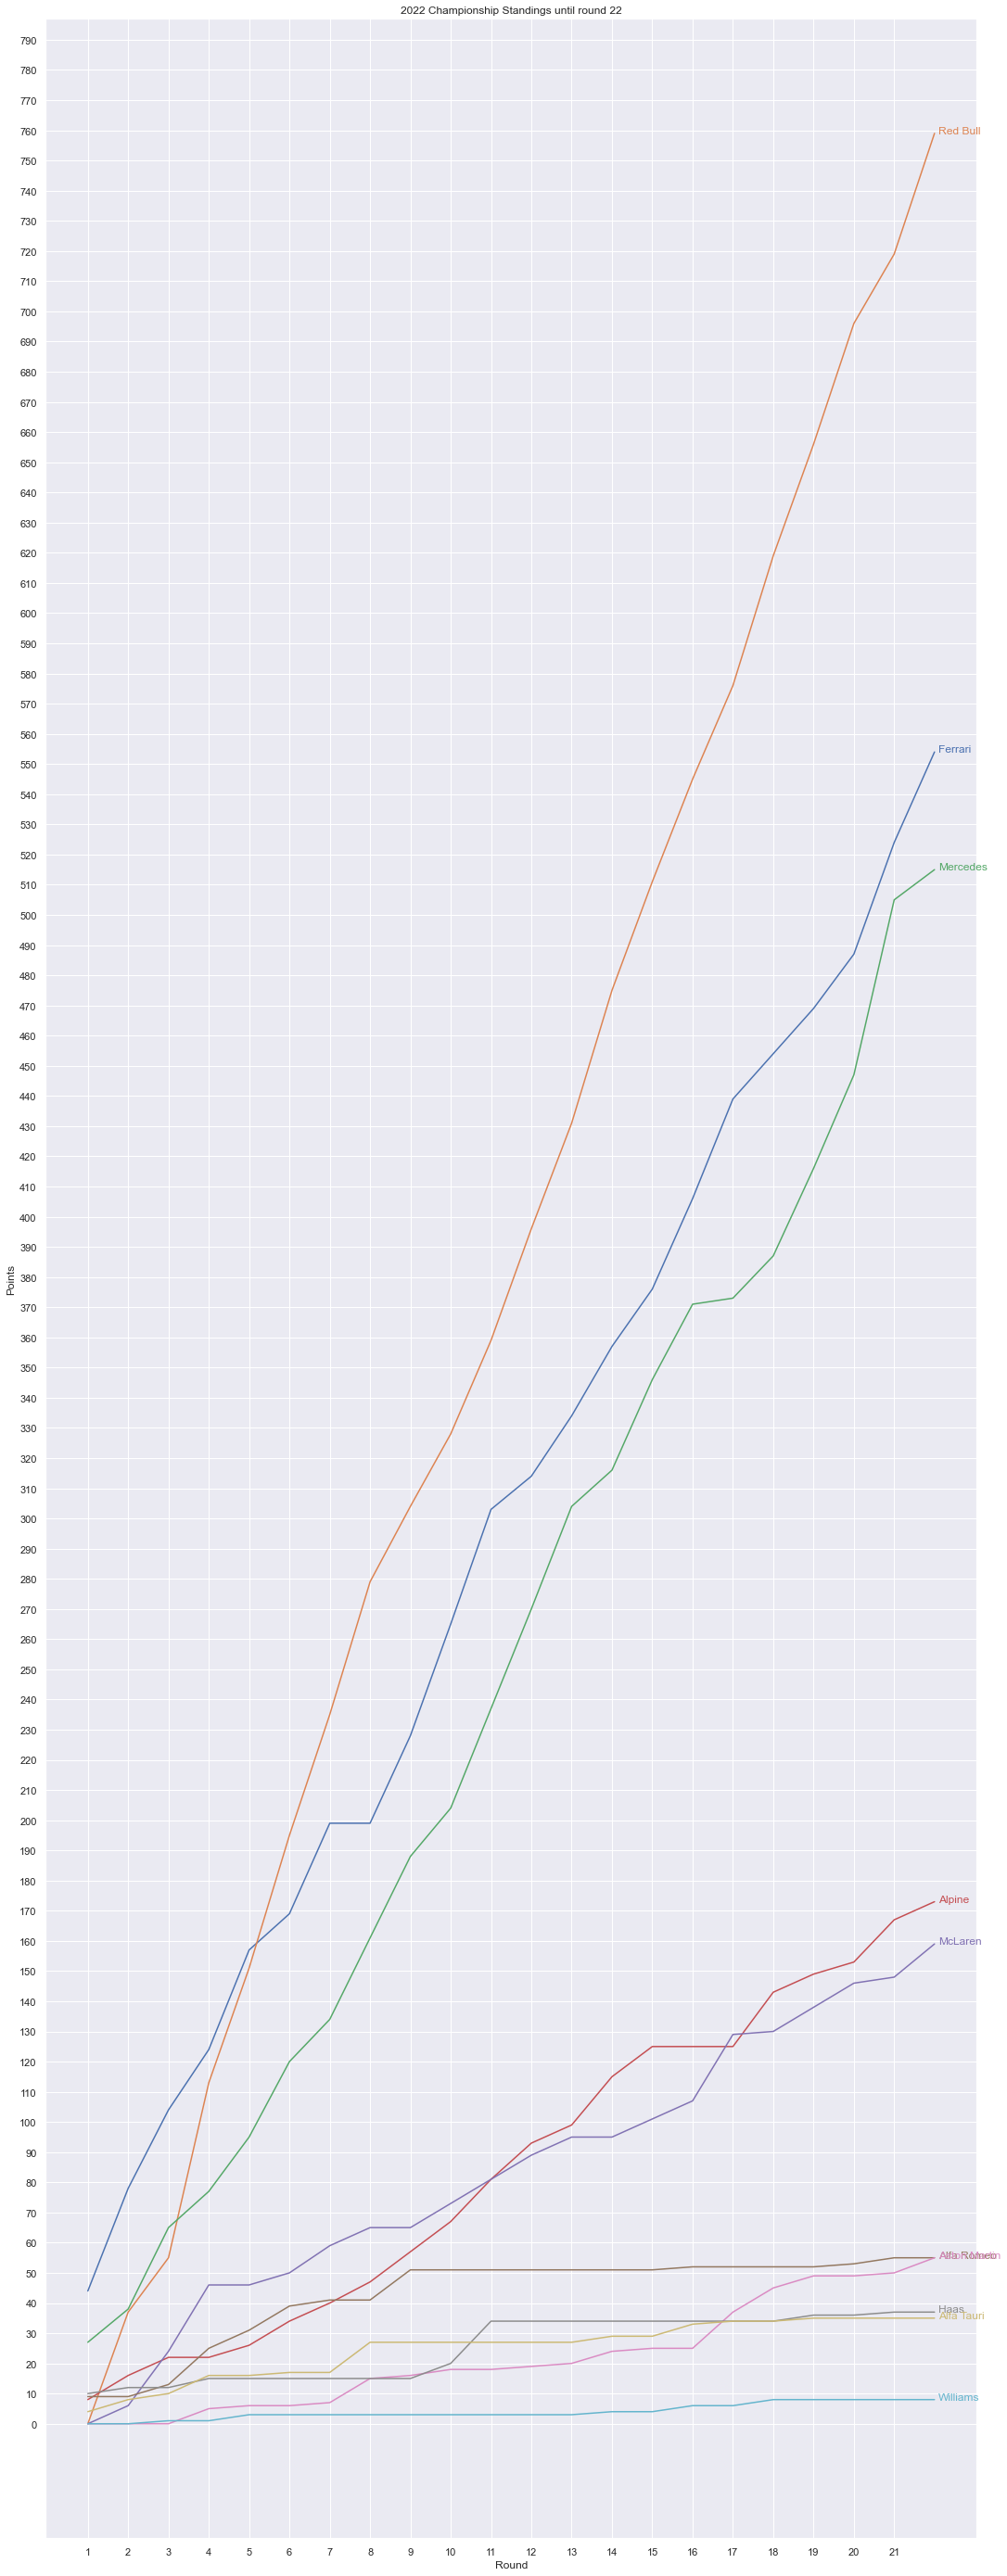

In [22]:
# Increase the size of the plot 
sns.set(rc={'figure.figsize':(18,50)})

# Initiate the plot
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title("2022 Championship Standings until round 22")

# Draw a line for every comand in the data by looping through all the standings
for driver in pd.unique(all_championship_standings_melted2['variable']):
    sns.lineplot(
        x='round', 
        y='value', 
        data=all_championship_standings_melted2.loc[all_championship_standings_melted2['variable']==driver]
    )

# Invert Y-axis to have championship leader (#1) on top
#ax.invert_yaxis()

# Set the values that appear on the x- and y-axes
ax.set_xticks(range(1, rounds))
ax.set_yticks(range(0, 800, 10))

# Set the labels of the axes
ax.set_xlabel("Round")
ax.set_ylabel("Points")


# Add the driver name to the lines
for line, name in zip(ax.lines, all_championship_standings2.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
        
    text = ax.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(0, 0),
        color=line.get_color(),
        xycoords=(
            ax.get_xaxis_transform(),
            ax.get_yaxis_transform()
        ),
        textcoords="offset points"
    )